Pratyush Singh - Lab 5

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import pickle
import pandas as pd

## Higgs

For this lab, my partner and I have chosen to analyze the LHC data family. I have chosen the dataset 1. Let us import in the higgs dataset first and see what we find out about this particular subset.

In [2]:
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
new_dict = pickle.load(infile)
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

Using `new_dict.keys()`, we are able to identify the columns of this file. It appears that we have 14 columns, we will explore what they all mean soon. More information is needed about the file itself before we can proceed with analyzing it. We will use `type()` to explore what type our loaded file is.

In [3]:
type(new_dict)

pandas.core.frame.DataFrame

`type()` has revealed that this is a pandas DataFrame, which is significantly useful as `pandas`, just like `numpy` is designed for vectorized operations. Further, this means we should be able to view a part of the data before we proceed with further analysis.

In [4]:
# Print the first 5 rows
new_dict.head(5)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118


In [5]:
print("The shape of this dataframe is:", new_dict.shape)
print("The data types in this dataframe are:\n",new_dict.dtypes)

The shape of this dataframe is: (100000, 14)
The data types in this dataframe are:
 pt            float64
eta           float64
phi           float64
mass          float64
ee2           float64
ee3           float64
d2            float64
angularity    float64
t1            float64
t2            float64
t3            float64
t21           float64
t32           float64
KtDeltaR      float64
dtype: object


Upon initial exploration of the higgs dataset, we find that there are 100,000 rows and 14 columns, and each column has a data type of float64. This will allow us to do some precursory descriptive statistics. 

In [6]:
cols = new_dict.columns
max_val = []
min_val = []
mean_val = []
for i in cols:
    max_val.append(new_dict[i].max())
    min_val.append(new_dict[i].min())
    mean_val.append(new_dict[i].mean())
view_pd = pd.DataFrame(np.array([max_val,min_val,mean_val]),columns=cols,index=['MAX','MIN','MEAN'])
view_pd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
MAX,494.205477,3.264195,3.141444,142.439607,0.318725,0.030043,33.722824,0.060482,4.204353,2.446424,1.024776,0.983046,0.981718,1.078074
MIN,250.076799,-3.202213,-3.141587,8.971221,0.006938,0.000002,0.275143,0.000002,0.491827,0.051114,0.038887,0.034160,0.090195,0.011027
MEAN,447.386623,-0.000899,0.002112,114.892387,0.125630,0.002704,1.966660,0.004289,0.901415,0.309755,0.225898,0.348189,0.755682,0.526579


In the above DataFrame, we can see the maximum, minimum, and mean values for each of the columns. Before we make plots, we will discuss how the data was taken and what the features of the data mean.

The paper used as a reference in this lab is [Identification of boosted Higgs bosons decaying into b-quark pairs with the ATLAS detector at 13 TeV](https://arxiv.org/pdf/1906.11005.pdf). The data is simulated. There are 100k "jets" and the filed label higgs is the signals and the file labeled ccd is the background dataset. <br>
<br>
We are looking at LHC data simulated by [Alex Schuy](https://github.com/AlexSchuy/qsvm_jet_tagging/tree/master/qsvm_jet_tagging/generation). As we saw above the samples represent a binary classification problem, where we see two different datasets/classes. The first one being jets from Higgs decay and the second one is jets from the QCD background. The features/columns which we explore earlier are kinematic data from the jets and energy correlators. The construction of efficient discriminating observables is typically guided by Monte Carlo simulations. Referencing the paper above, we can go more in depth on how the data was acquired / simulated. We are looking at proton-proton (pp) collision runs and correspond to a total integrated luminosity of 36.1 $fb^{-1}$ at $\sqrt{s}$ = 13 TeV. The paper writes that "several Monte Carlo (MC) simulated event samples were used for the optimisation of the Higgs boson tagger, estimation of its performance, and the comparisons between data and simulation." The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The problem lies with the fact that due to large amounts of QCD background containmination, a direct 5-sigma observation of this Higgs channel is not accomplished as of yet. The purpose, then, is to enhance the discovery sensitivity by optimizing event selection.

<br>We can now describe what the kinematic features are. <br> <br>
pt: Transverse (x-y plane) momentum <br>
eta: Pseudorapidity <br>
phi: Azimuthal Angle <br>
mass: Invariant Mass <br>
ee2: 2-point ECF ratio <br>
ee3: 3-point ECF ratio <br>
d2: 3-to-2-point ECF ratio <br>
angularity: angularity
<br> <br>
With the help of my partner, the last few variables are: <br>
t1: "N-subjettiness measures the degree to which radiation within a jet is aligned along N candidate subjet axes"
<br>
t2: 2-subjettiness, for any given particle, we now have two axes instead of one <br>
t3: 3-subjettiness, the mean will be even moreso reduced by the addition of an extra axis compared to t2. <br>
t21: This is the ratio of subjettinesses t2 / t1 for a given jet. <br>
t32: This is the ratio for a given jet of its variables t3 / t2. <br>
KDeltaR: 

We can now make a few plots to get a general idea of how our data looks and behaves.

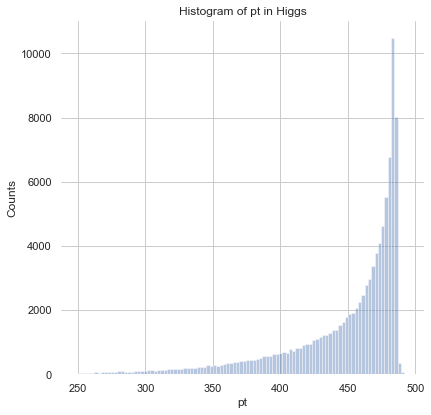

In [7]:
#Plotting with pt
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['pt'],bins=100,kde=False)
ax.set_title("Histogram of pt in Higgs");
ax.set_ylabel("Counts");

At first glance, this distribution resembles a Rayleigh thats right skewed / centered near the upper end of the values.

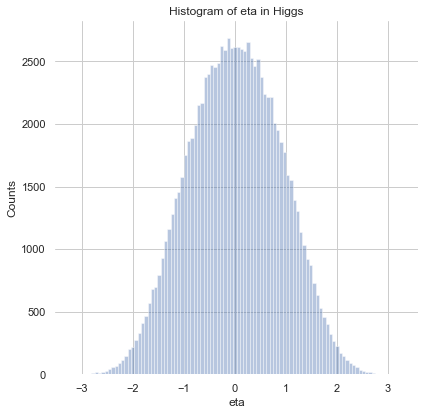

In [8]:
#plotting with eta
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['eta'],bins=100,kde=False)
ax.set_title("Histogram of eta in Higgs");
ax.set_ylabel("Counts");

At first glance, this distribution is normally distributed around 0.

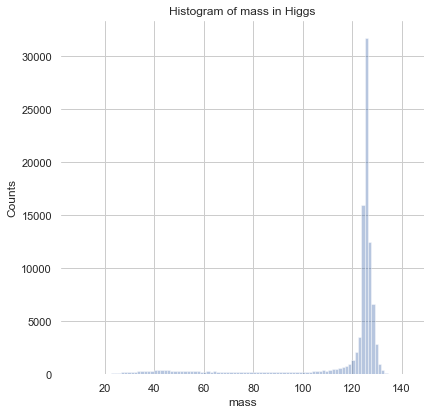

In [9]:
#plotting with mass
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['mass'],bins=100,kde=False)
ax.set_title("Histogram of mass in Higgs");
ax.set_ylabel("Counts");

I do see two peaks here although the ones around about 43ish are too smal in counts, so this could almost be binomially distributed but I would say this is normal, centered around 125-130.

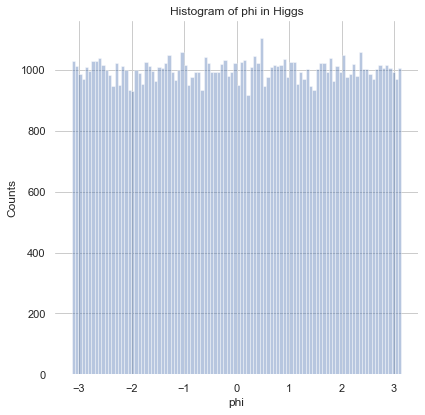

In [10]:
#plotting with phi
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['phi'],bins=100,kde=False)
ax.set_title("Histogram of phi in Higgs");
ax.set_ylabel("Counts");

Nothing here as expected as this is the Azimuthal Angle, which should expect would show high counts all around.

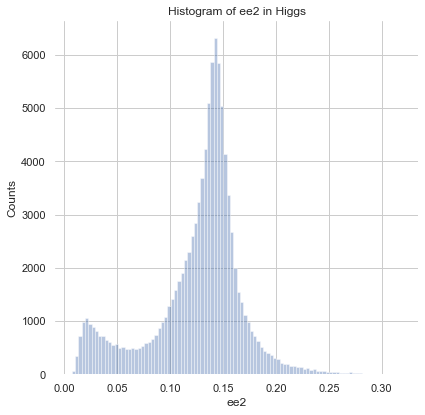

In [11]:
#plotting with ee2
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['ee2'],bins=100,kde=False)
ax.set_title("Histogram of ee2 in Higgs");
ax.set_ylabel("Counts");

There are two peaks here for sure, although the counts are MUCH higher on the central one. Binomial maybe?

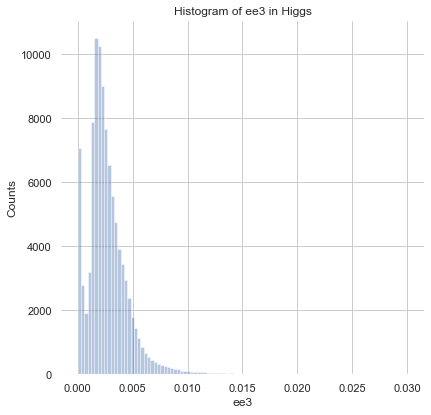

In [12]:
#plotting with ee3
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['ee3'],bins=100,kde=False)
ax.set_title("Histogram of ee3 in Higgs");
ax.set_ylabel("Counts");

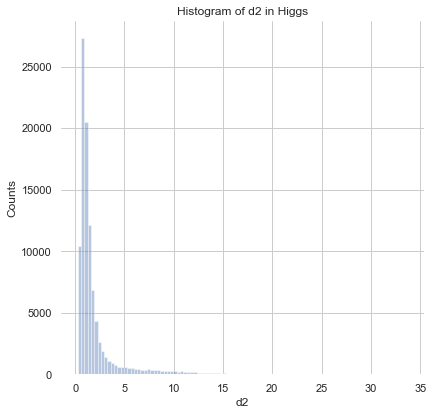

In [13]:
#plotting with d2
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['d2'],bins=100,kde=False)
ax.set_title("Histogram of d2 in Higgs");
ax.set_ylabel("Counts");

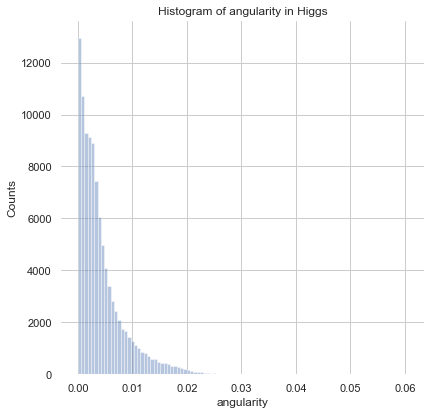

In [14]:
#plotting with angularity
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['angularity'],bins=100,kde=False)
ax.set_title("Histogram of angularity in Higgs");
ax.set_ylabel("Counts");

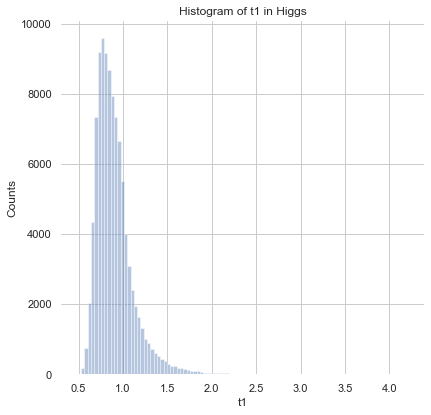

In [15]:
#plotting with t1
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['t1'],bins=100,kde=False)
ax.set_title("Histogram of t1 in Higgs");
ax.set_ylabel("Counts");

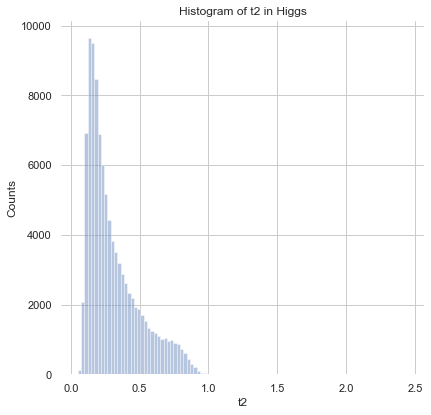

In [16]:
#plotting with t2
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['t2'],bins=100,kde=False)
ax.set_title("Histogram of t2 in Higgs");
ax.set_ylabel("Counts");

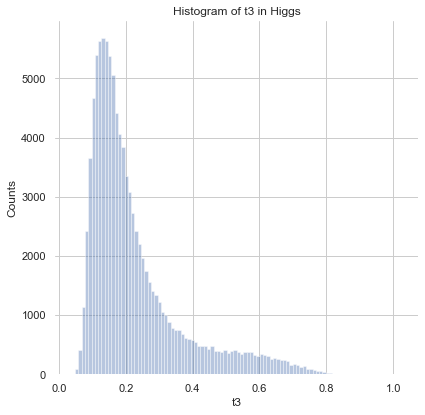

In [17]:
#plotting with t3
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['t3'],bins=100,kde=False)
ax.set_title("Histogram of t3 in Higgs");
ax.set_ylabel("Counts");

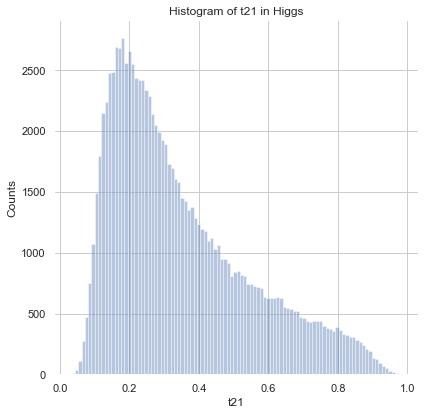

In [18]:
#plotting with t21
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['t21'],bins=100,kde=False)
ax.set_title("Histogram of t21 in Higgs");
ax.set_ylabel("Counts");

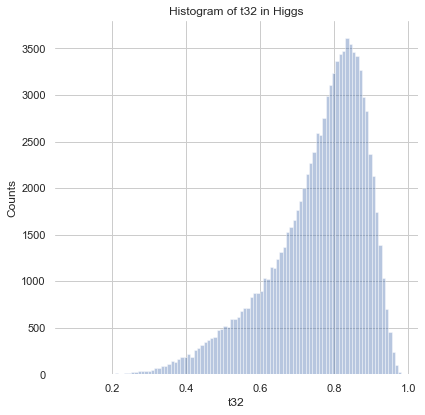

In [19]:
#plotting with t32
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['t32'],bins=100,kde=False)
ax.set_title("Histogram of t32 in Higgs");
ax.set_ylabel("Counts");

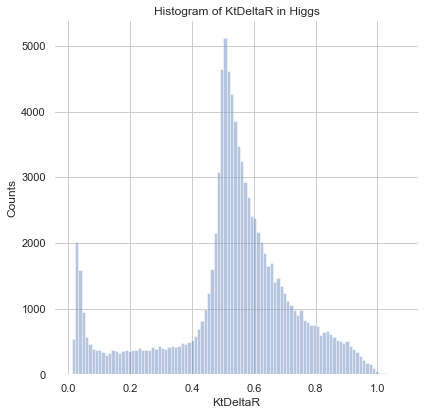

In [20]:
#plotting with KtDeltaR
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict['KtDeltaR'],bins=100,kde=False)
ax.set_title("Histogram of KtDeltaR in Higgs");
ax.set_ylabel("Counts");

## QCD

We can follow the same reasoning for the QCD dataset. Let us start again by importing.

In [21]:
infile = open ("qcd_100000_pt_250_500.pkl",'rb')
new_dict1 = pickle.load(infile)
new_dict1.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

We observe that this dataset also has the same features (as expected), we can run the same precursory analysis on this.

In [22]:
cols = new_dict1.columns
max_val = []
min_val = []
mean_val = []
for i in cols:
    max_val.append(new_dict1[i].max())
    min_val.append(new_dict1[i].min())
    mean_val.append(new_dict1[i].mean())
view_pd = pd.DataFrame(np.array([max_val,min_val,mean_val]),columns=cols,index=['MAX','MIN','MEAN'])
view_pd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
MAX,499.999840,3.192603,3.141572,321.397993,0.495944,1.162739e-01,101.156561,5.360182e-02,3.941721,1.780207,1.111759,0.991104,0.988284,1.270750
MIN,250.125101,-3.240244,-3.141537,9.292817,0.002392,6.406594e-07,0.281344,5.803207e-07,0.392616,0.044932,0.026275,0.035544,0.077015,0.004970
MEAN,445.708383,-0.002447,-0.002548,97.738041,0.089894,3.524497e-03,5.209383,4.941442e-03,0.913344,0.590302,0.476382,0.649212,0.805052,0.320726


Since the QCD dataset is essentially the background, we do see some differences here compared to the Higgs dataset. I assume moving forward that we will use these two files to better isolate the background so we can move towards the 5-sigma observation of the Higgs channel.

I will plot the same graphs as above to visually explore this dataset.

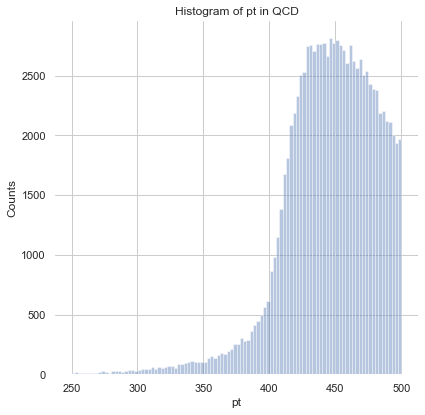

In [23]:
#Plotting with pt
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['pt'],bins=100,kde=False)
ax.set_title("Histogram of pt in QCD");
ax.set_ylabel("Counts");

Very different from the Higgs file, we expect that since this is our QCD background.

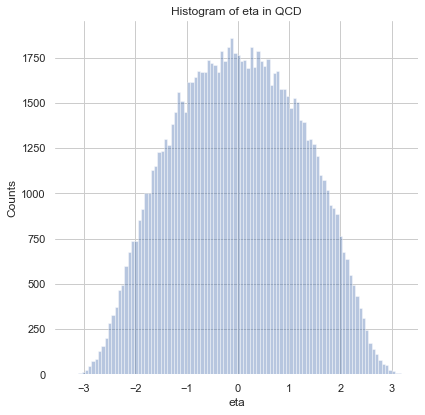

In [24]:
#plotting with eta
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['eta'],bins=100,kde=False)
ax.set_title("Histogram of eta in QCD");
ax.set_ylabel("Counts");

Still normally distributed, although with fatter as we expect since this is the background.

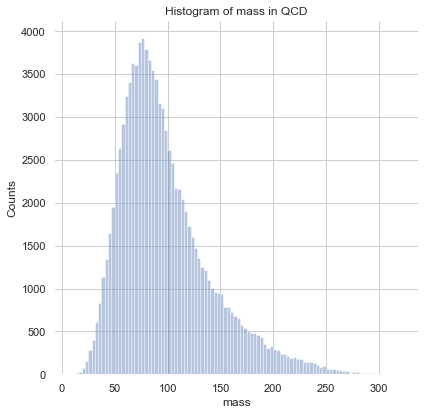

In [25]:
#plotting with mass
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['mass'],bins=100,kde=False)
ax.set_title("Histogram of mass in QCD");
ax.set_ylabel("Counts");

Looks like Rayleigh.

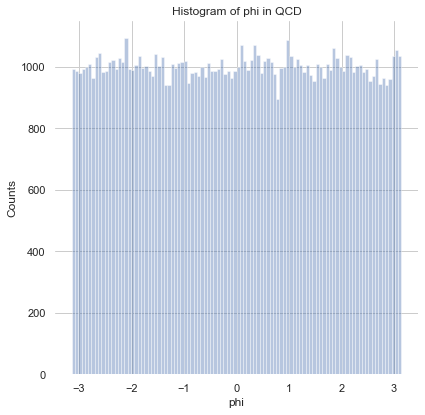

In [26]:
#plotting with phi
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['phi'],bins=100,kde=False)
ax.set_title("Histogram of phi in QCD");
ax.set_ylabel("Counts");

Still nothing here, as this is still the angle.

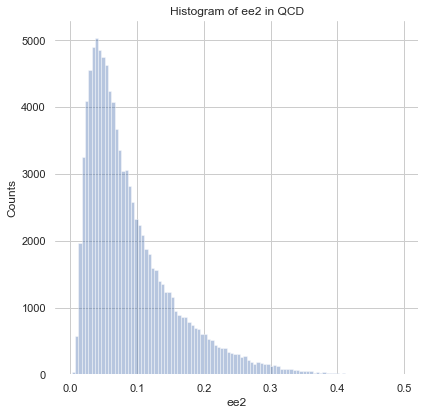

In [27]:
#plotting with ee2
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['ee2'],bins=100,kde=False)
ax.set_title("Histogram of ee2 in QCD");
ax.set_ylabel("Counts");

Looks like rayliegh

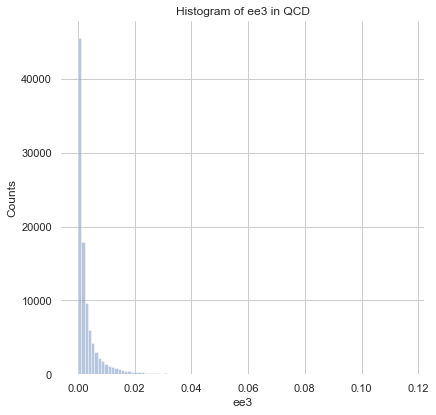

In [28]:
#plotting with ee3
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['ee3'],bins=100,kde=False)
ax.set_title("Histogram of ee3 in QCD");
ax.set_ylabel("Counts");

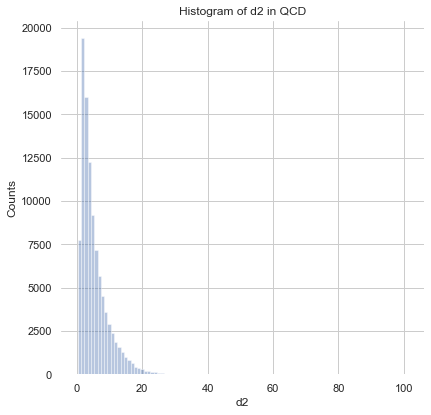

In [29]:
#plotting with d2
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['d2'],bins=100,kde=False)
ax.set_title("Histogram of d2 in QCD");
ax.set_ylabel("Counts");

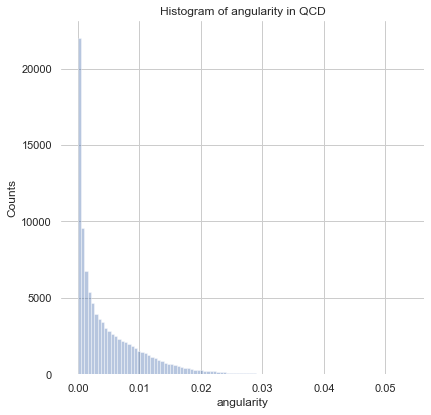

In [30]:
#plotting with angularity
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['angularity'],bins=100,kde=False)
ax.set_title("Histogram of angularity in QCD");
ax.set_ylabel("Counts");

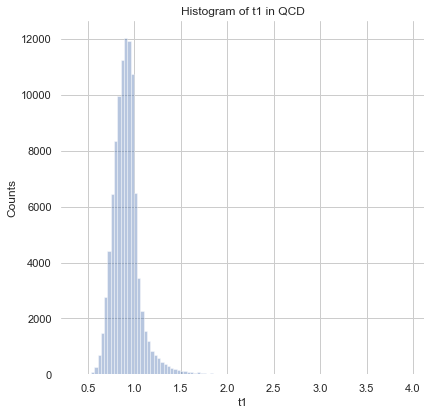

In [31]:
#plotting with t1
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['t1'],bins=100,kde=False)
ax.set_title("Histogram of t1 in QCD");
ax.set_ylabel("Counts");

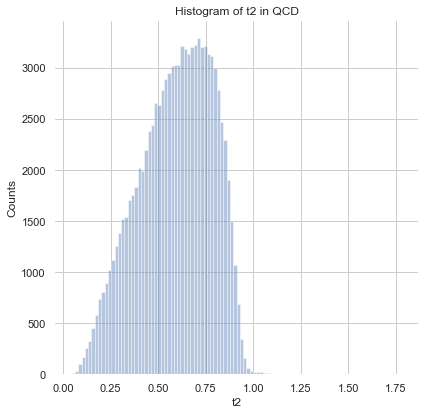

In [32]:
#plotting with t2
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['t2'],bins=100,kde=False)
ax.set_title("Histogram of t2 in QCD");
ax.set_ylabel("Counts");

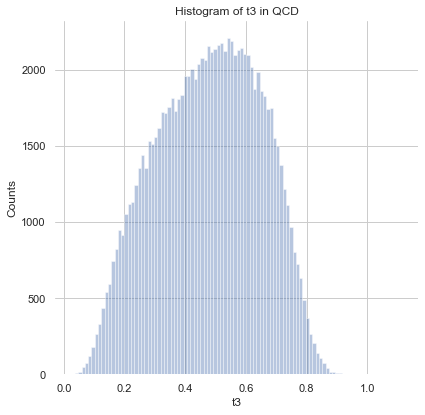

In [33]:
#plotting with t3
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['t3'],bins=100,kde=False)
ax.set_title("Histogram of t3 in QCD");
ax.set_ylabel("Counts");

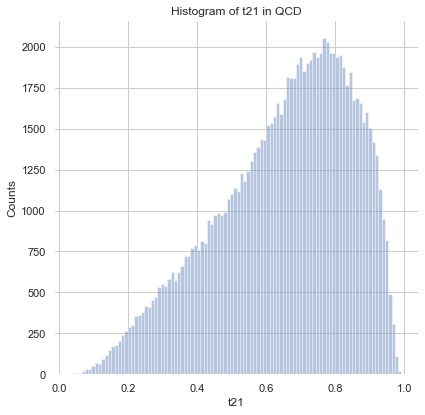

In [34]:
#plotting with t21
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['t21'],bins=100,kde=False)
ax.set_title("Histogram of t21 in QCD");
ax.set_ylabel("Counts");

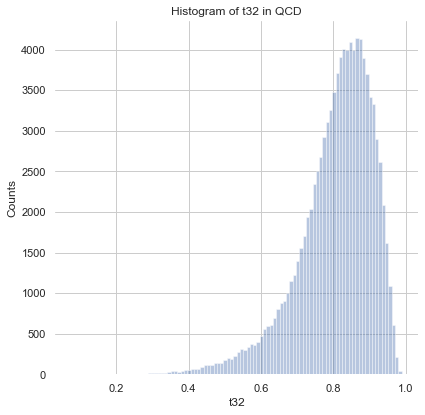

In [35]:
#plotting with t32
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['t32'],bins=100,kde=False)
ax.set_title("Histogram of t32 in QCD");
ax.set_ylabel("Counts");

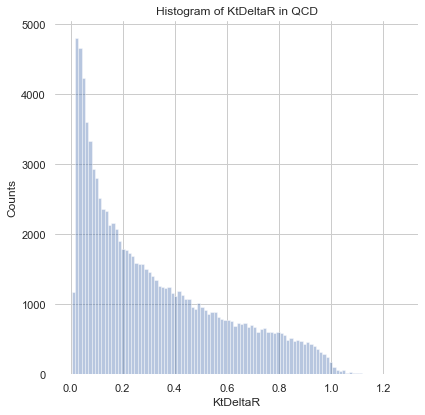

In [36]:
#plotting with KtDeltaR
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.distplot(new_dict1['KtDeltaR'],bins=100,kde=False)
ax.set_title("Histogram of KtDeltaR in QCD");
ax.set_ylabel("Counts");